In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
sex_piviot = train_data.pivot_table(values='Survived',index='Sex')

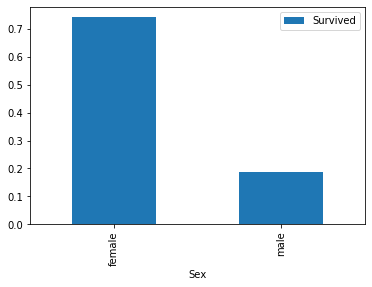

In [7]:
sex_piviot.plot.bar()
plt.show()

In [8]:
def create_dummy(df,column):
    dummies = pd.get_dummies(df[column],prefix=column,drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    return df

In [9]:
train_data = create_dummy(train_data,'Sex')

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
test_data = create_dummy(test_data,'Sex')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [12]:
train_data.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [13]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [14]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Sex_male      0
dtype: int64

In [15]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_data.Embarked = train_data.Embarked.fillna('S')
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Sex_male      0
dtype: int64

In [18]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
dtype: int64

In [19]:
train_data = create_dummy(train_data,'Embarked')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,0,1


In [20]:
test_data = create_dummy(test_data,'Embarked')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [21]:
train_data['Title'] = train_data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
title = train_data['Title'].unique()
print(title)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [22]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,0,1,Mr


In [23]:
test_data['Title'] = test_data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,Mrs


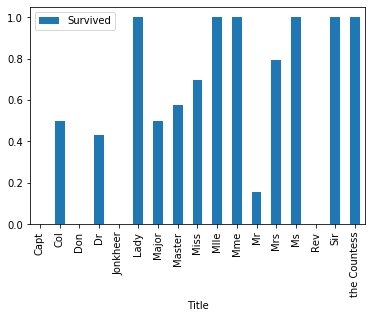

In [25]:
title_piviot = train_data.pivot_table(values='Survived',index='Title')
title_piviot.plot.bar()
plt.show()

In [26]:
train_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Sir               1
Lady              1
Don               1
Mme               1
Ms                1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [27]:
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [28]:
train_data.Age.isnull().sum()

177

In [29]:
train_data.Age.fillna(-1,inplace=True)
test_data.Age.fillna(-1,inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_age = StandardScaler()
train_data.Age = sc_age.fit_transform(train_data.Age.values.reshape(-1,1))
test_data.Age = sc_age.transform(test_data.Age.values.reshape(-1,1))

In [31]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",male,-0.089634,1,0,7.2500,NaN,S,1,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.806350,1,0,71.2833,C85,C,0,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,0.134362,0,0,7.9250,NaN,S,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.638353,1,0,53.1000,C123,S,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,0.638353,0,0,8.0500,NaN,S,1,0,1,Mr


In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",male,0.610353,0,0,330911,7.8292,NaN,Q,1,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.310340,1,0,363272,7.0000,NaN,S,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,2.150325,0,0,240276,9.6875,NaN,Q,1,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,0.190361,0,0,315154,8.6625,NaN,S,1,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.089634,1,1,3101298,12.2875,NaN,S,0,0,1,Mrs


In [33]:
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [34]:
train_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Sir               1
Lady              1
Don               1
Mme               1
Ms                1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [35]:
replacement = {
    'Dona' : 0,
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

train_data['Title'] = train_data['Title'].apply(lambda x: replacement.get(x))

In [36]:
train_data.Title.value_counts()

1    517
5    182
6    125
4     40
0      9
7      7
2      7
3      4
Name: Title, dtype: int64

In [37]:
test_data['Title'] = test_data['Title'].apply(lambda x: replacement.get(x))
test_data.Title.value_counts()

1    240
5     78
6     72
4     21
0      3
3      2
7      1
2      1
Name: Title, dtype: int64

In [40]:
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Title           0
dtype: int64

In [41]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

In [43]:
sc_title = StandardScaler()
train_data.Title = sc_title.fit_transform(train_data.Title.values.reshape(-1,1))
test_data.Title = sc_title.transform(test_data.Title.values.reshape(-1,1))

In [44]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",male,-0.089634,1,0,7.2500,NaN,S,1,0,1,-0.797294
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.806350,1,0,71.2833,C85,C,0,0,0,1.537975
2,1,3,"Heikkinen, Miss. Laina",female,0.134362,0,0,7.9250,NaN,S,0,0,1,1.070922
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.638353,1,0,53.1000,C123,S,0,0,1,1.537975
4,0,3,"Allen, Mr. William Henry",male,0.638353,0,0,8.0500,NaN,S,1,0,1,-0.797294


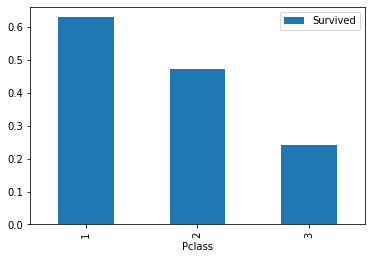

In [45]:
piviot_pclass = train_data.pivot_table(values='Survived',index='Pclass')
piviot_pclass.plot.bar()
plt.show()

In [46]:
sc_pclass = StandardScaler()
train_data.Pclass = sc_pclass.fit_transform(train_data.Pclass.values.reshape(-1,1))
test_data.Pclass = sc_pclass.transform(test_data.Pclass.values.reshape(-1,1))

In [47]:
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Title           0
dtype: int64

In [48]:
train_data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
C82            1
B78            1
B94            1
A20            1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [49]:
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Title           0
dtype: int64

In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

In [53]:
test_data.Fare = test_data.Fare.fillna(-1)

In [54]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

In [55]:
sc_fare = StandardScaler()

In [56]:
train_data.Fare = sc_fare.fit_transform(train_data.Fare.values.reshape(-1,1))
test_data.Fare = sc_fare.transform(test_data.Fare.values.reshape(-1,1))

In [57]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Title
0,0,0.827377,"Braund, Mr. Owen Harris",male,-0.089634,1,0,-0.502445,NaN,S,1,0,1,-0.797294
1,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.806350,1,0,0.786845,C85,C,0,0,0,1.537975
2,1,0.827377,"Heikkinen, Miss. Laina",female,0.134362,0,0,-0.488854,NaN,S,0,0,1,1.070922
3,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.638353,1,0,0.420730,C123,S,0,0,1,1.537975
4,0,0.827377,"Allen, Mr. William Henry",male,0.638353,0,0,-0.486337,NaN,S,1,0,1,-0.797294


In [59]:
cols = ['SibSp', 'Parch']
for col in cols:
    sc = StandardScaler()
    train_data[col + "_scaled"] = sc.fit_transform(train_data[col].values.reshape(-1,1))
    test_data[col + "_scaled"] = sc.transform(test_data[col].values.reshape(-1,1))

In [60]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title',
       'SibSp_scaled', 'Parch_scaled'],
      dtype='object')

In [63]:
columns = ['Pclass','Age','SibSp_scaled','Parch_scaled','Fare','Sex_male','Embarked_Q','Embarked_S','Title']

In [64]:
train_data[columns]

,Pclass,Age,SibSp_scaled,Parch_scaled,Fare,Sex_male,Embarked_Q,Embarked_S,Title
0,0.827377,-0.089634,0.432793,-0.473674,-0.502445,1,0,1,-0.797294
1,-1.566107,0.806350,0.432793,-0.473674,0.786845,0,0,0,1.537975
2,0.827377,0.134362,-0.474545,-0.473674,-0.488854,0,0,1,1.070922
3,-1.566107,0.638353,0.432793,-0.473674,0.420730,0,0,1,1.537975
4,0.827377,0.638353,-0.474545,-0.473674,-0.486337,1,0,1,-0.797294
...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.190361,-0.474545,-0.473674,-0.386671,1,0,1,-1.264348
887,-1.566107,-0.257631,-0.474545,-0.473674,-0.044381,0,0,1,1.070922
888,0.827377,-1.377611,0.432793,2.008933,-0.176263,0,0,1,1.070922
889,-1.566107,0.134362,-0.474545,-0.473674,-0.044381,1,0,0,-0.797294


In [65]:
test_data[columns]

,Pclass,Age,SibSp_scaled,Parch_scaled,Fare,Sex_male,Embarked_Q,Embarked_S,Title
0,0.827377,0.610353,-0.474545,-0.473674,-0.490783,1,1,0,-0.797294
1,0.827377,1.310340,0.432793,-0.473674,-0.507479,0,0,1,1.537975
2,-0.369365,2.150325,-0.474545,-0.473674,-0.453367,1,1,0,-0.797294
3,0.827377,0.190361,-0.474545,-0.473674,-0.474005,1,0,1,-0.797294
4,0.827377,-0.089634,0.432793,0.767630,-0.401017,0,0,1,1.537975
...,...,...,...,...,...,...,...,...,...
413,0.827377,-1.377611,-0.474545,-0.473674,-0.486337,1,0,1,-0.797294
414,-1.566107,0.862349,-0.474545,-0.473674,1.544246,0,0,0,-1.264348
415,0.827377,0.834349,-0.474545,-0.473674,-0.502445,1,0,1,-0.797294
416,0.827377,-1.377611,-0.474545,-0.473674,-0.486337,1,0,1,-0.797294


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(train_data[columns], train_data.Survived, test_size=0.2, random_state=42)

In [70]:
rf = RandomForestClassifier(random_state=1)
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}
grid = GridSearchCV(rf,param_grid=hyperparameters,cv=10)
grid.fit(X_train,y_train)
best_params = grid.best_params_
best_score = grid.best_score_

In [71]:
best_score

0.8357198748043817

In [72]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(test_data[columns])

In [73]:
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],'Survived':y_pred})
submission.to_csv('submission_3.csv',index=False)